In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Stock/NFLX.csv')

In [ ]:
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-08,374.010010,378.390015,368.309998,371.119995,371.119995,6908900
1,2020-04-09,371.059998,372.100006,363.029999,370.720001,370.720001,7711300
2,2020-04-13,371.309998,400.510010,367.700012,396.720001,396.720001,11692900
3,2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000
4,2020-04-15,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
5,2020-04-16,437.000000,449.519989,431.609985,439.170013,439.170013,16128700


In [ ]:
# Get the number of trading days
df.shape

(251, 7)

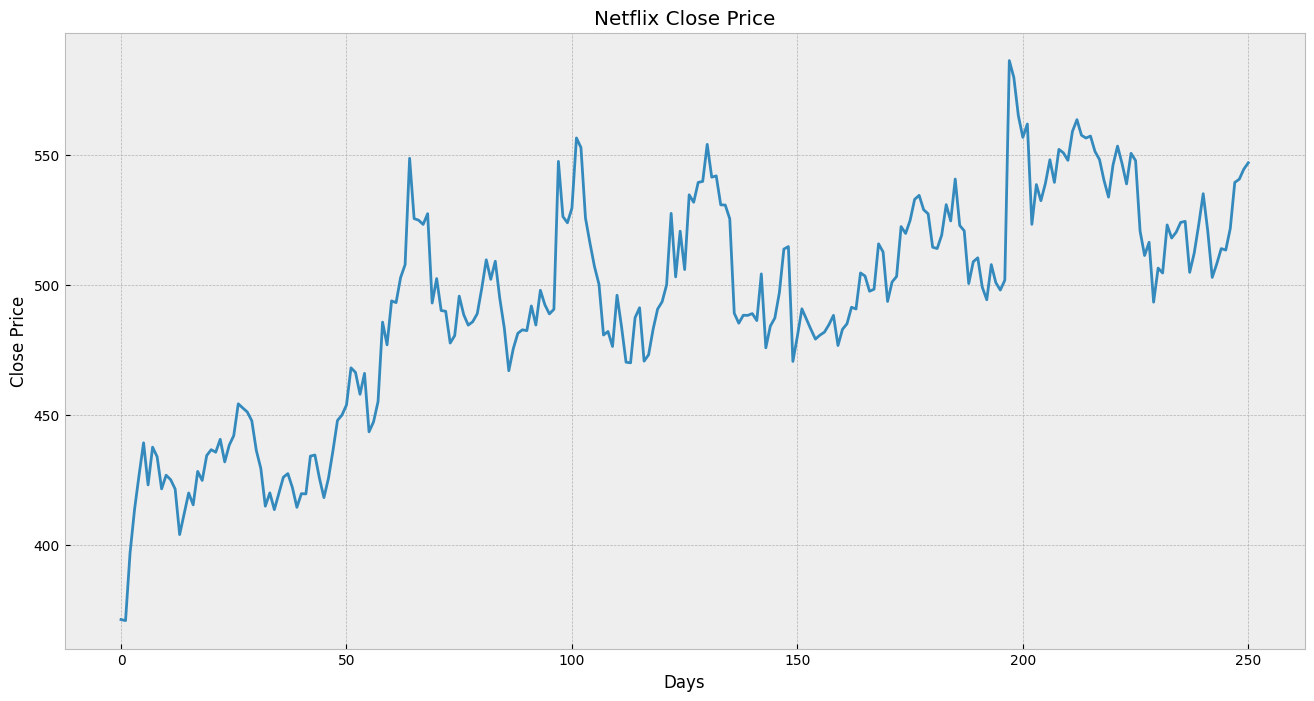

In [ ]:
# visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [ ]:
# Get the close price
df = df[['Close']]
df.head()

,Close
0,371.119995
1,370.720001
2,396.720001
3,413.549988
4,426.750000


In [ ]:
# Create a var to predict 'x' days out into the future
future_days = 25

# New column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)
# df.tail(4)

,Close,Prediction
0,371.119995,441.950012
1,370.720001,454.190002
2,396.720001,452.579987
3,413.549988,451.040009


In [ ]:
# Create the future data set (X)
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[371.119995]
 [370.720001]
 [396.720001]
 [413.549988]
 [426.75    ]
 [439.170013]
 [422.959991]
 [437.48999 ]
 [433.829987]
 [421.420013]
 [426.700012]
 [424.98999 ]
 [421.380005]
 [403.829987]
 [411.890015]
 [419.850006]
 [415.269989]
 [428.149994]
 [424.679993]
 [434.26001 ]
 [436.529999]
 [435.549988]
 [440.519989]
 [431.820007]
 [438.269989]
 [441.950012]
 [454.190002]
 [452.579987]
 [451.040009]
 [447.670013]
 [436.25    ]
 [429.320007]
 [414.769989]
 [419.890015]
 [413.440002]
 [419.730011]
 [425.920013]
 [427.309998]
 [421.970001]
 [414.329987]
 [419.600006]
 [419.48999 ]
 [434.049988]
 [434.480011]
 [425.559998]
 [418.070007]
 [425.5     ]
 [436.130005]
 [447.769989]
 [449.869995]
 [453.720001]
 [468.040009]
 [466.26001 ]
 [457.850006]
 [465.910004]
 [443.399994]
 [447.23999 ]
 [455.040009]
 [485.640015]
 [476.890015]
 [493.809998]
 [493.160004]
 [502.779999]
 [507.76001 ]
 [548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.

In [ ]:
y = np.array(df['Prediction'])[:-future_days]
y

array([441.950012, 454.190002, 452.579987, 451.040009, 447.670013,
       436.25    , 429.320007, 414.769989, 419.890015, 413.440002,
       419.730011, 425.920013, 427.309998, 421.970001, 414.329987,
       419.600006, 419.48999 , 434.049988, 434.480011, 425.559998,
       418.070007, 425.5     , 436.130005, 447.769989, 449.869995,
       453.720001, 468.040009, 466.26001 , 457.850006, 465.910004,
       443.399994, 447.23999 , 455.040009, 485.640015, 476.890015,
       493.809998, 493.160004, 502.779999, 507.76001 , 548.72998 ,
       525.5     , 524.880005, 523.26001 , 527.390015, 492.98999 ,
       502.410004, 490.100006, 489.820007, 477.579987, 480.450012,
       495.649994, 488.51001 , 484.480011, 485.799988, 488.880005,
       498.619995, 509.640015, 502.109985, 509.079987, 494.730011,
       483.380005, 466.929993, 475.470001, 481.329987, 482.679993,
       482.350006, 491.869995, 484.529999, 497.899994, 492.309998,
       488.809998, 490.579987, 547.530029, 526.27002 , 523.890

In [ ]:
# Split 75-25 for train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Create the models
# DT regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
# Get the last x rows from future_dataset
X_future = df.drop(['Prediction'], axis=1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[561.929993],
       [523.280029],
       [538.599976],
       [532.390015],
       [539.039978],
       [548.159973],
       [539.450012],
       [552.159973],
       [550.789978],
       [547.919983],
       [559.070007],
       [563.590027],
       [557.590027],
       [556.52002 ],
       [557.280029],
       [551.340027],
       [548.219971],
       [540.219971],
       [533.780029],
       [546.150024],
       [553.409973],
       [546.700012],
       [538.849976],
       [550.640015],
       [547.820007]])

In [ ]:
# Show the model tree prediction
tree_predict = tree.predict(X_future)
print(tree_predict)
print()

# Show the model LR
lr_predict = lr.predict(X_future)
print(lr_predict)

[520.700012 511.290009 516.390015 493.329987 540.669983 504.540009
 523.059998 518.02002  520.25     524.030029 524.440002 520.700012
 512.179993 534.659973 535.090027 520.809998 502.859985 547.919983
 513.950012 539.419983 521.659973 539.419983 540.669983 544.530029
 546.98999 ]

[536.42476648 518.83721815 525.80851334 522.98268951 526.00873491
 530.15876084 526.19531963 531.97894865 531.3555366  530.04955412
 535.12333856 537.18015989 534.44987817 533.96297475 534.30881453
 531.60583472 530.18606275 526.54568713 523.61521115 529.24413967
 532.54775734 529.49441004 525.92227508 531.28729639 530.00406035]


<ipython-input-19-5af93afd1cfe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


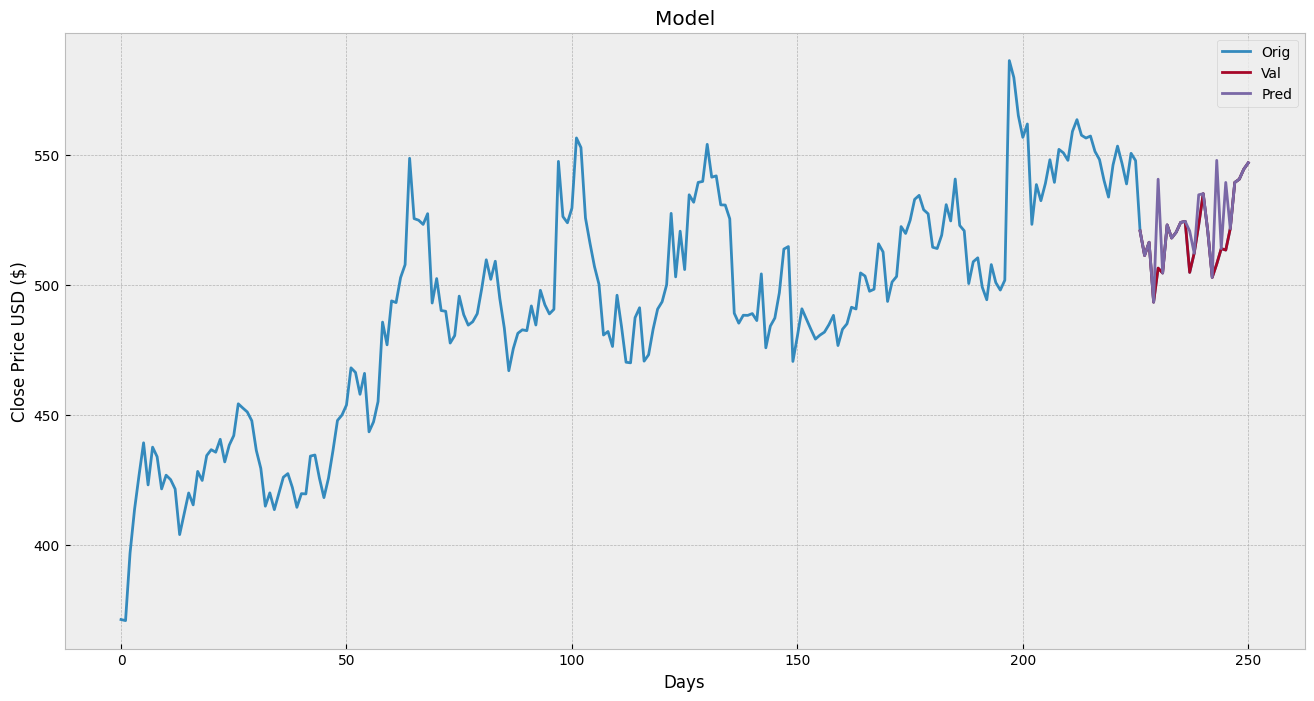

In [ ]:
# Visualize the data
predictions = tree.predict(X_future) # Call the predict method with X_future to get predicted values

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])

<ipython-input-20-2c8e3d97063e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


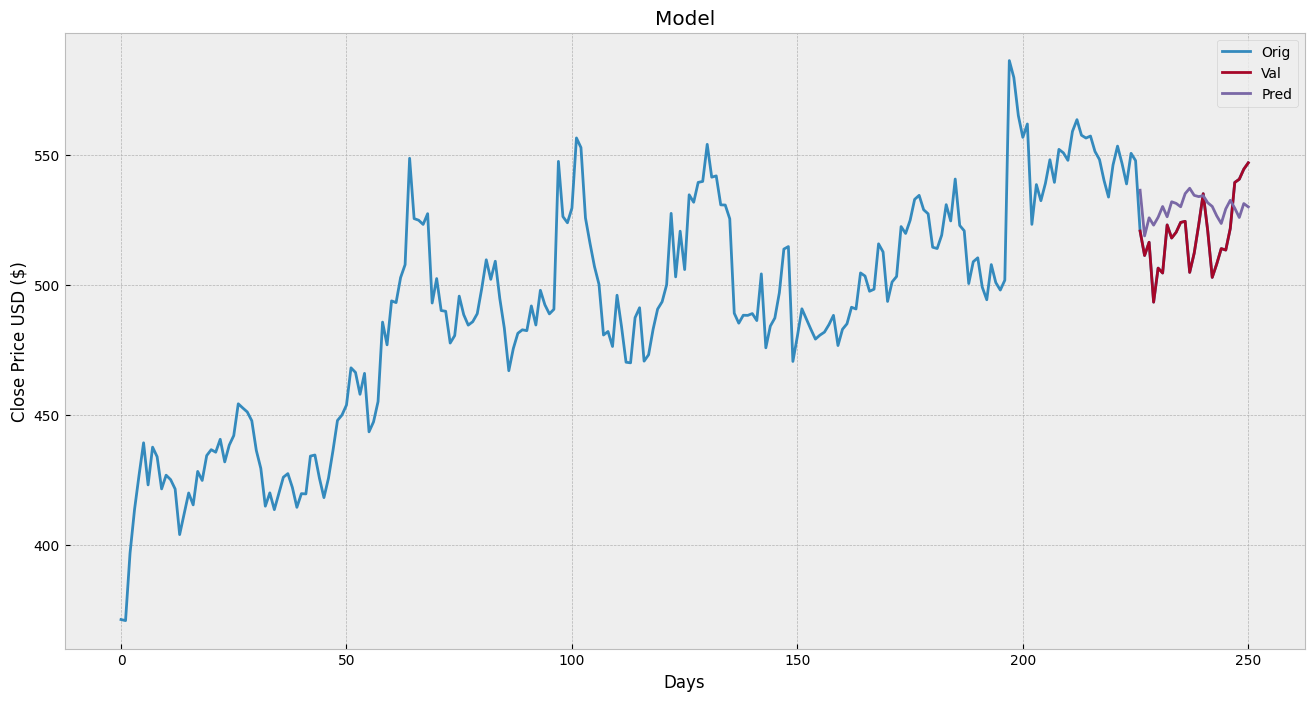

In [ ]:
# Visualize the data
predictions = lr_predict

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])